# TODO
- #TODO: Run locally
- #TODO: Train commaAI
- #TODO: WEIGHTNING BERÜCKSICHTIGEN -> anders gelöst
- #TODO: Remove no steering
- #TODO: Balancing, less complexity, 

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import self_driving_car
from self_driving_car import data_generator
from imp import reload
%matplotlib inline

In [2]:
reload(self_driving_car.data_generator)
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset1_udacity")
datagen.add_dataset("dataset2_twe_one_lap")
datagen.add_dataset("dataset3_ssz_one_lap")
##datagen.auto_prepare();
datagen.shuffle()
datagen.split()
datagen.smooth_steering(window=40);
datagen.filter_data_not_moving()
datagen.filter_data_low_steering(low_steering_threshold = 0.03, low_steering_remove_prop = 0.3)
datagen.filter_data_low_steering(low_steering_threshold = 0.02, low_steering_remove_prop = 0.5)
datagen.filter_data_low_steering(low_steering_threshold = 0.01, low_steering_remove_prop = 0.7)
datagen.correct_camera_steering(0.02) # -0.2?
#datagen.deactivate_mod('mod_blur')
#datagen.deactivate_mod('mod_shadow')

shuffled data
split data into 135189 training sample and 15021 validation samples
-0.00720605969626
-0.00720094151638


/home/carnd/CarND-Behavioral-Cloning-P3/self_driving_car/data_generator.py:249: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  fwd = pd.stats.moments.ewma( steering, span=window )
/home/carnd/CarND-Behavioral-Cloning-P3/self_driving_car/data_generator.py:250: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  bwd = pd.stats.moments.ewma( steering[::-1], span=window )


steering angle has been smoothed based on window 40
6145 samples removed due to speed < 10.000000
30216 samples randomly removed due to steering < 0.030000
31527 samples randomly removed due to steering < 0.020000
17916 samples randomly removed due to steering < 0.010000
steering angle corrected by +/- 0.020000


In [3]:
print("Number of samples:           ", datagen.num_of_samples('all'))
print("Numver of training samples:  ", datagen.num_of_samples('train'))
print("Number of validation samples:", datagen.num_of_samples('valid'))

Number of samples:            64406
Numver of training samples:   57735
Number of validation samples: 6671


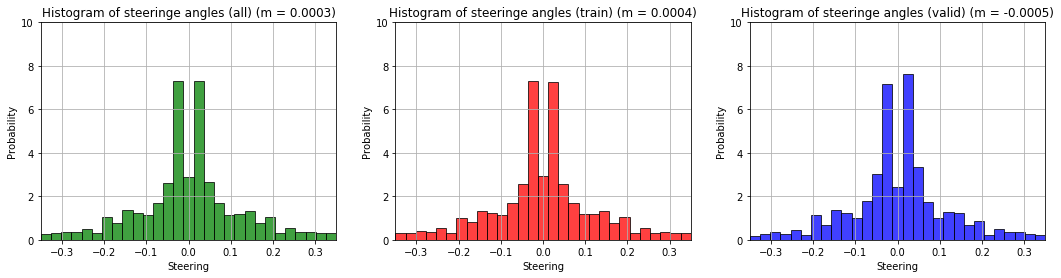

In [ ]:
x1 = datagen.data['steering'].values
#x1 = datagen.data[datagen.data['filter'] == 'mod_identity']['steering'].values
x2 = datagen.data[datagen.data['is_train'] == True]['steering'].values
x3 = datagen.data[datagen.data['is_valid'] == True]['steering'].values

# the histogram of the data
fig = plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title(r'Histogram of steeringe angles (all) (m = %.4f)' % np.mean(x1)); plt.grid(zorder=0)
n, bins, patches = plt.hist(x1, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='green', alpha=0.75)
plt.xlabel('Steering'); plt.ylabel('Probability')
plt.xlim((-0.35,0.35)); plt.ylim((0,10));
plt.subplot(1,3,2)
plt.title(r'Histogram of steeringe angles (train) (m = %.4f)' % np.mean(x2)); plt.grid(True);
n, bins, patches = plt.hist(x2, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='red', alpha=0.75)
plt.xlabel('Steering'); plt.ylabel('Probability')
plt.xlim((-0.35,0.35)); plt.ylim((0,10));
plt.subplot(1,3,3)
plt.title(r'Histogram of steeringe angles (valid) (m = %.4f)' % np.mean(x3)); plt.grid(True)
n, bins, patches = plt.hist(x3, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='blue', alpha=0.75)
plt.xlabel('Steering'); plt.ylabel('Probability')
plt.xlim((-0.35,0.35)); plt.ylim((0,10)); 
plt.show()

In [ ]:
from self_driving_car import model
reload(self_driving_car)
reload(self_driving_car.model)
if True:
    model = self_driving_car.model.SDRegressionModel("simple")
    model.train_generator(datagen, "20170209_F_more_data_simple", nb_epoch = 12, samples_per_epoch = 19200)
else:
    model = self_driving_car.model.SDRegressionModel("commaAI_modified")
    model.train_generator(datagen, "20170209_D", nb_epoch = 5, samples_per_epoch = 11000)

Using TensorFlow backend.


Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/20
19200/19200 [==============================] - 172s - loss: 0.0360 - val_loss: 0.0292
Epoch 2/20
19200/19200 [==============================] - 169s - loss: 0.0342 - val_loss: 0.0268
Epoch 3/20
10560/19200 [===============>..............] - ETA: 74s - loss: 0.0329 

In [ ]:
datagen.data

## We do not need accuracy for regression task, only loss

SLACK: Accuracy is not a valid metric in this task because it's not a classification, but rather a regression... 
Accuracy is how many classes you predicted correctly in the batch.  Here we're trying to come up with a continuous number between `+1` to `-1`.  So remove `accuracy` from the metrics list of `model.compile` (edited)
So validation loss is all that's important here.  Secondly: If the car isn't moving, that's usually do to an error in the `model.predict` and keras is not very good at saying what happened

In [ ]:
history = model._history
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('#epoch'); plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [ ]:
import pydot_ng
from keras.utils.visualize_util import plot
plot(model.model, to_file=('doc/images/model_%s.png' % model.modelname))

# Simple
![A](./doc/images/model_simple.png)
# CommaAI
![B](./doc/images/model_commaAI.png)
# CommaAI_modified
![C](./doc/images/model_commaAI_modified.png)